# UNDERSTAND THE PROBLEM STATEMENT

From vegetable production to delivery, several common steps are operated manually. Like picking, and sorting vegetables. Therefore, we decided to solve this problem using deep neural architecture, by developing a model that can detect and classify vegetables. That model can be implemented in different types of devices and can also solve other problems related to the identification of vegetables, like labeling the vegetables automatically without any need for human work.

The initial experiment is done with 15 types of common vegetables that are found throughout the world. The vegetables that are chosen for the experimentation are- bean, bitter gourd, bottle gourd, brinjal, broccoli, cabbage, capsicum, carrot, cauliflower, cucumber, papaya, potato, pumpkin, radish and tomato. A total of 21000 images from 15 classes are used where each class contains 1400 images of size 224×224 and in *.jpg format. The dataset split 70% for training, 15% for validation, and 15% for testing purpose.

https://www.researchgate.net/publication/352846889_DCNN-Based_Vegetable_Image_Classification_Using_Transfer_Learning_A_Comparative_Study

# IMPORTING LIBRARIES AND PREPARE DATASET

In [1]:
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
import keras.utils as image
from keras.preprocessing.image import ImageDataGenerator
import os, shutil

In [2]:
# Folder path

train_path = "Vegetable Images/train"
validation_path = "Vegetable Images/validation"
test_path = "Vegetable Images/test"

In [3]:
gen = ImageDataGenerator(rescale = 1.0/255.0)

In [21]:
# Create DirectoryIterator

train_image_generator = gen.flow_from_directory(
                                            train_path,
                                            target_size=(256,256),
                                            batch_size=32,
                                            class_mode='sparse')

val_image_generator = gen.flow_from_directory(
                                            validation_path,
                                            target_size=(256,256),
                                            batch_size=32,
                                            class_mode='sparse')

test_image_generator = gen.flow_from_directory(
                                            test_path,
                                            target_size=(256,256),
                                            batch_size=1,
                                            class_mode='sparse')

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [5]:
train_image_generator.class_indices

{'Bean': 0,
 'Bitter_Gourd': 1,
 'Bottle_Gourd': 2,
 'Brinjal': 3,
 'Broccoli': 4,
 'Cabbage': 5,
 'Capsicum': 6,
 'Carrot': 7,
 'Cauliflower': 8,
 'Cucumber': 9,
 'Papaya': 10,
 'Potato': 11,
 'Pumpkin': 12,
 'Radish': 13,
 'Tomato': 14}

# PERFORM DATA VISUALIZATION

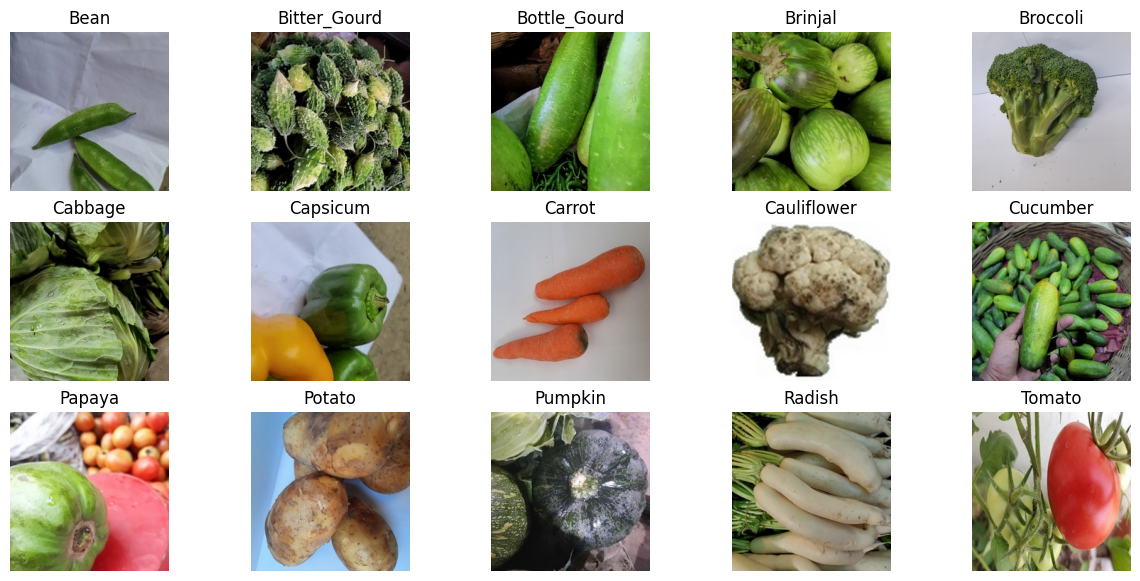

In [6]:
image_categories = os.listdir("Vegetable Images/train")

def plot_images(image_categories):
    
    # Create a figure
    plt.figure(figsize=(15, 7))
    for i, cat in enumerate(image_categories):
        
        # Load images for the ith category
        image_path = train_path + '/' + cat
        images_in_folder = os.listdir(image_path)
        first_image_of_folder = images_in_folder[1]
        first_image_path = image_path + '/' + first_image_of_folder
        img = image.load_img(first_image_path)
        
        # Create Subplot and plot the images
        plt.subplot(3, 5, i+1)
        plt.imshow(img)
        plt.title(cat)
        plt.axis('off')
        
    plt.show()
    

# Call the function
plot_images(image_categories)


In [7]:
def categories_plot(dataset):
    class_indices = dataset.class_indices
    labels = list(class_indices.keys())
    label_counts = dataset.labels
    unique_labels, label_counts = np.unique(label_counts, return_counts=True)
    colors = ['red', 'green', 'blue', 'pink', 'purple', 'orange', 'cyan', 'brown', 'gray', 'yellow',
              'magenta', 'olive', 'indigo', 'salmon', 'teal']
    # Vẽ biểu đồ cột
    plt.figure(figsize=(10, 6))
    plt.bar(labels, label_counts, color = colors)
    plt.xlabel("Category")
    plt.ylabel("Number")
    if dataset == train_image_generator: plt.title("Number of Samples per Category (Train Set)")
    elif dataset == test_image_generator: plt.title("Number of Samples per Category (Test Set)")
    else: plt.title("Number of Samples per Category (Val Set)")
    plt.xticks(rotation=45) 
    plt.show()

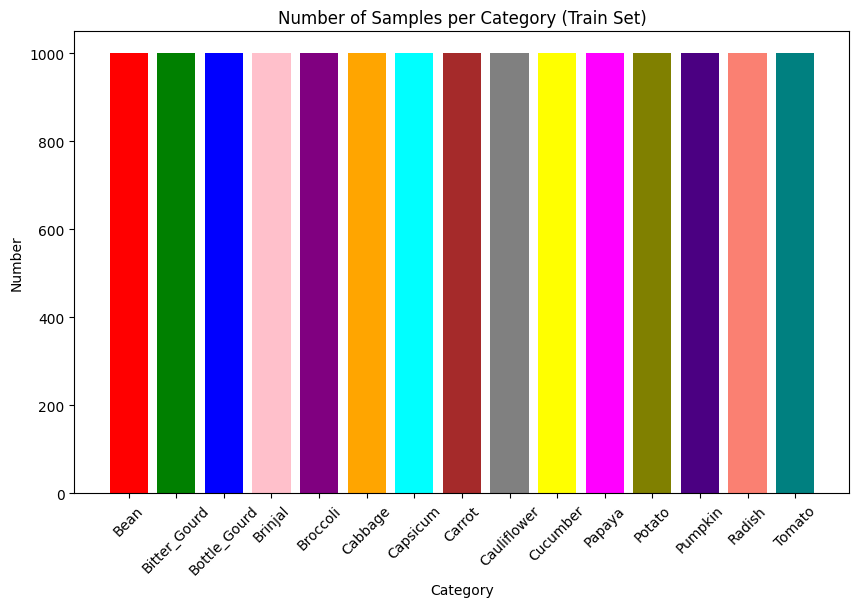

In [8]:
categories_plot(train_image_generator)

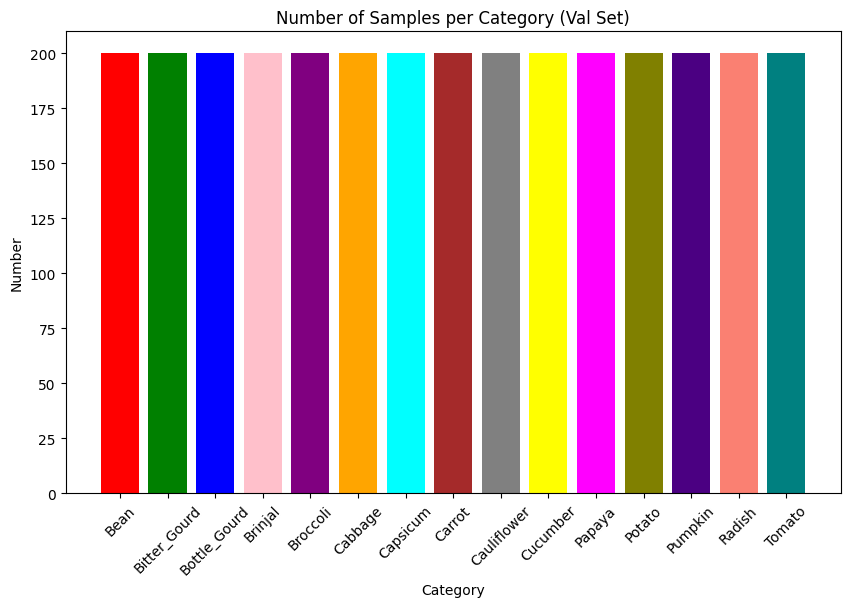

In [9]:
categories_plot(val_image_generator)

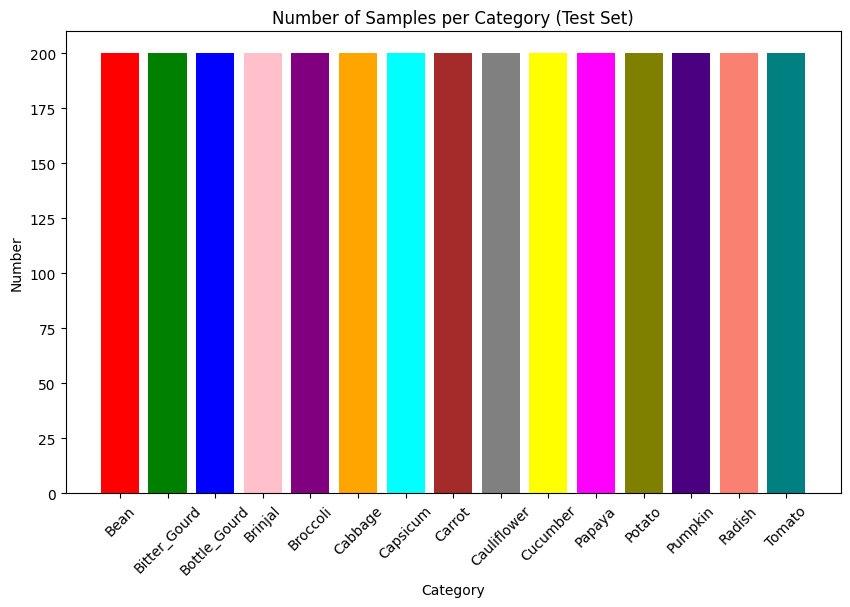

In [10]:
categories_plot(test_image_generator)

In [11]:
print(f"Size of training data: {train_image_generator.image_shape} ({train_image_generator.samples} images)")
print(f"Labels: {train_image_generator.labels}")

Size of training data: (256, 256, 3) (15000 images)
Labels: [ 0  0  0 ... 14 14 14]


In [12]:
print(f"Size of val data: {val_image_generator.image_shape} ({val_image_generator.samples} images)")
print(f"Labels: {val_image_generator.labels}")

Size of val data: (256, 256, 3) (3000 images)
Labels: [ 0  0  0 ... 14 14 14]


In [13]:
print(f"Size of test data: {test_image_generator.image_shape} ({test_image_generator.samples} images)")
print(f"Labels: {train_image_generator.labels}")

Size of test data: (256, 256, 3) (3000 images)
Labels: [ 0  0  0 ... 14 14 14]


# BUILD DEEP LEARNING MODEL

In [14]:
# Build a custom sequential CNN model

model = keras.Sequential() # model object

# Add Layers
model.add(Conv2D(filters=32, kernel_size=5, activation='relu', input_shape=[256,256,3]))
model.add(MaxPooling2D(2))
model.add(Conv2D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling2D(2))

# Flatten the feature map
model.add(Flatten())

# Add the fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(15, activation='softmax'))

# Print the model summary
model.summary()

# Complie the model
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 57, 57, 64)        102464    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

# COMPILE AND TRAIN

In [15]:
early_stopping = keras.callbacks.EarlyStopping(patience=5)

In [16]:
# fit the model
hist = model.fit(train_image_generator, 
                 epochs=50, 
                 verbose=1, 
                 validation_data=val_image_generator, 
                 callbacks=early_stopping)

Epoch 1/50
469/469 [==============================] - 41s 75ms/step - loss: 1.7040 - accuracy: 0.3996 - val_loss: 1.1261 - val_accuracy: 0.6227
Epoch 2/50
469/469 [==============================] - 34s 72ms/step - loss: 0.8894 - accuracy: 0.6976 - val_loss: 0.5473 - val_accuracy: 0.8310
Epoch 3/50
469/469 [==============================] - 34s 72ms/step - loss: 0.5610 - accuracy: 0.8183 - val_loss: 0.6381 - val_accuracy: 0.8097
Epoch 4/50
469/469 [==============================] - 34s 72ms/step - loss: 0.4134 - accuracy: 0.8677 - val_loss: 0.3153 - val_accuracy: 0.9113
Epoch 5/50
469/469 [==============================] - 35s 75ms/step - loss: 0.3111 - accuracy: 0.8997 - val_loss: 0.2872 - val_accuracy: 0.9110
Epoch 6/50
469/469 [==============================] - 36s 76ms/step - loss: 0.2626 - accuracy: 0.9173 - val_loss: 0.2923 - val_accuracy: 0.9240
Epoch 7/50
469/469 [==============================] - 35s 74ms/step - loss: 0.2141 - accuracy: 0.9311 - val_loss: 0.2667 - val_accuracy:

# PERFORMANCE

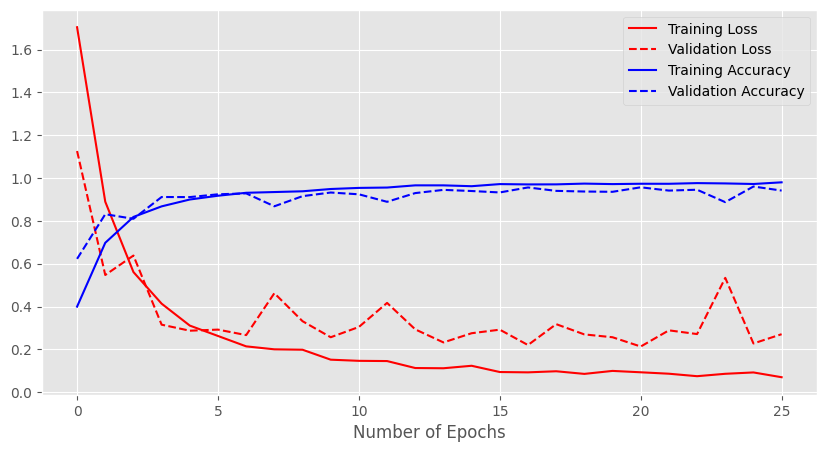

In [17]:
# Plot the error and accuracy
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

In [52]:
# Predict the accuracy for the test set
result = model.evaluate(test_image_generator)
print("[test loss, test accuracy]:", result)

3000/3000 [==============================] - 14s 5ms/step - loss: 0.2738 - accuracy: 0.9430
[test loss, test accuracy]: [0.2737618684768677, 0.9430000185966492]


In [82]:
# # Testing the Model

# test_image_path = 'Vegetable Images/test/Radish/1010.jpg'
# class_map = dict([(v, k) for k, v in train_image_generator.class_indices.items()])

# def generate_predictions(test_image_path, actual_label):
    
#     # 1. Load and preprocess the image
#     test_img = image.load_img(test_image_path, target_size=(256, 256))
#     test_img_arr = image.img_to_array(test_img)/255.0
#     test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

#     # 2. Make Predictions
#     predicted_label = np.argmax(model.predict(test_img_input))
#     predicted_vegetable = class_map[predicted_label]
#     plt.figure(figsize=(6, 6))
#     plt.imshow(test_img_arr)
#     plt.title("Pred: {}                       Actual: {}".format(predicted_vegetable, actual_label))
#     plt.grid()
#     plt.axis('off')
#     plt.show()

# # call the function
# generate_predictions(test_image_path, actual_label='Brocoli')

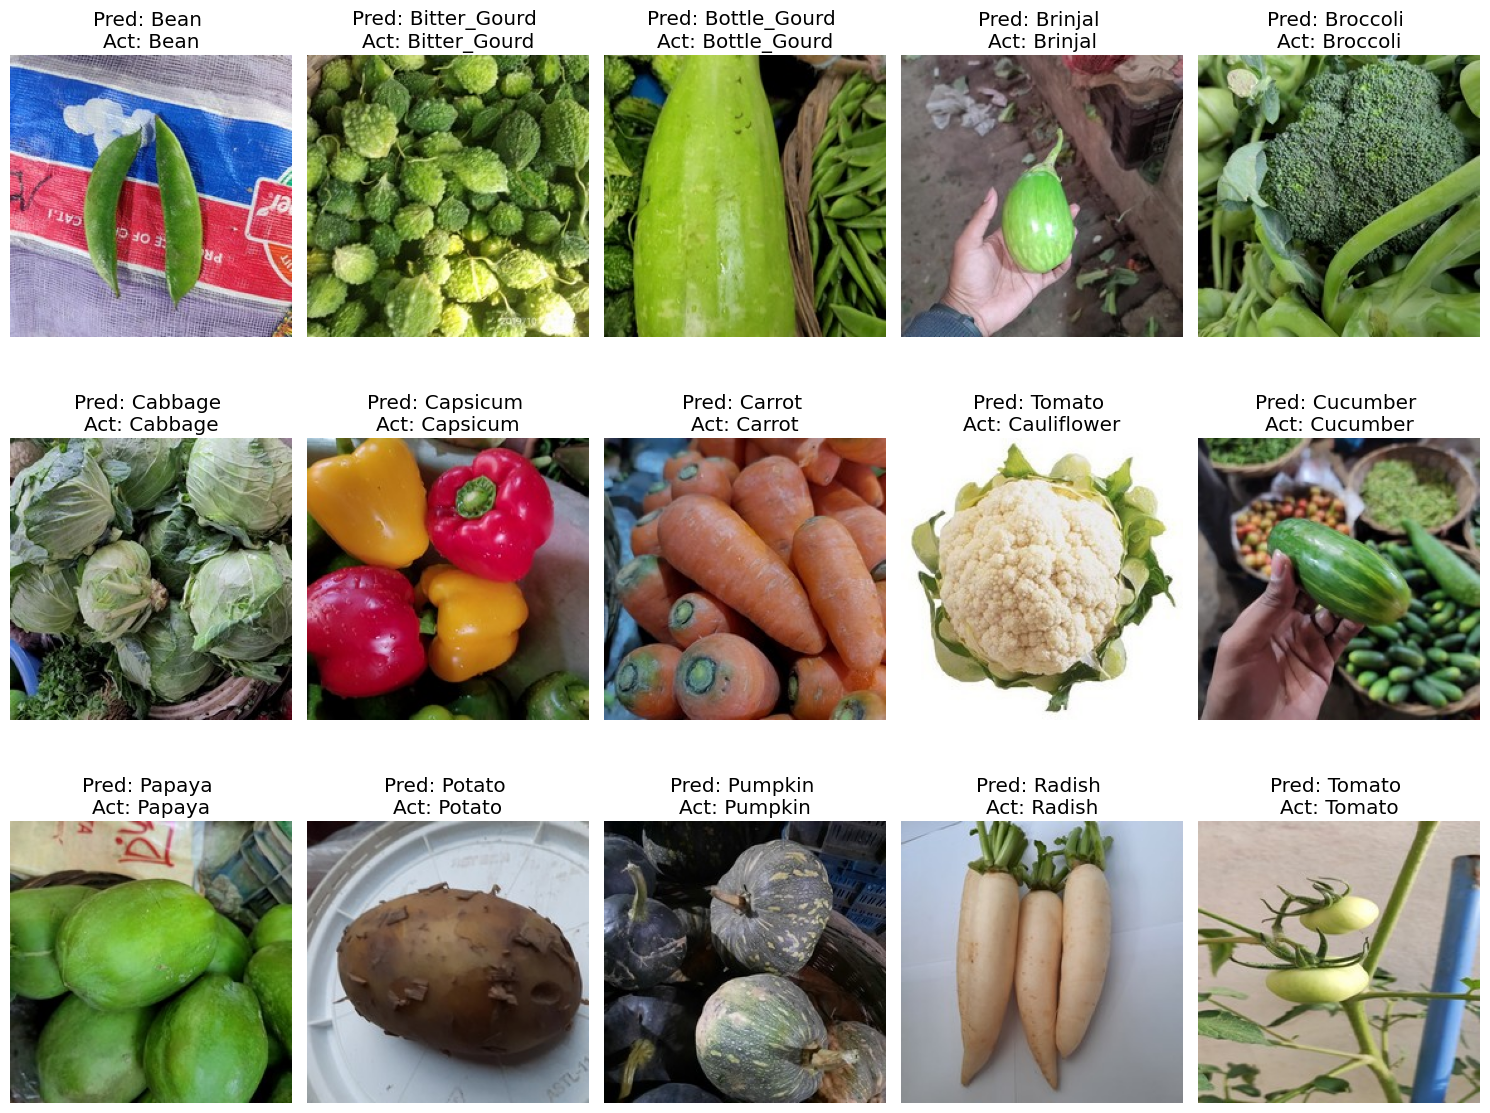

In [24]:
import os
import random
import matplotlib.pyplot as plt

root_folder = 'Vegetable Images/test/'
class_map = dict([(v, k) for k, v in train_image_generator.class_indices.items()])

num_rows = 3
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

for i, folder in enumerate(os.listdir(root_folder)):
    folder_path = os.path.join(root_folder, folder)
    
    if os.path.isdir(folder_path):
        
        image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        
        random_image = random.choice(image_files)
        
        image_path = os.path.join(folder_path, random_image)
        
        ax = axes[i // num_cols, i % num_cols]
        images = plt.imread(image_path)
        ax.imshow(images)
        ax.axis('off')
        test_img = image.load_img(image_path, target_size=(256, 256))
        test_img_arr = image.img_to_array(test_img)/255.0
        test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

        predicted_label = np.argmax(model.predict(test_img_input, verbose=0))
        predicted_vegetable = class_map[predicted_label]
        
        ax.set_title("Pred: {} \nAct: {}".format(predicted_vegetable, folder))

# Hiển thị lưới ảnh
plt.tight_layout()
plt.show()

# BUILD HYPERMODEL

In [25]:
import keras_tuner as kt

Using TensorFlow backend


In [33]:
def model_builder(hp):
    
    # Build a custom sequential CNN model
    model = keras.Sequential() # model object
    
    # Add Layers
    model.add(Conv2D(filters=32, kernel_size=5, activation='relu', input_shape=[256,256,3]))
    model.add(MaxPooling2D(2))
    model.add(Conv2D(filters=64, kernel_size=5, activation='relu'))
    model.add(MaxPooling2D(2))
    model.add(Conv2D(filters=64, kernel_size=5, activation='relu'))
    model.add(MaxPooling2D(2))
    model.add(Conv2D(filters=64, kernel_size=5, activation='relu'))
    model.add(MaxPooling2D(2))

    # Flatten the feature map
    model.add(Flatten())

    # Add the fully connected layers
    hp_units = hp.Int('units', min_value=32, max_value=256, step=32)
    model.add(Dense(units=hp_units, activation='relu'))
    hp_activation = hp.Choice('activation function', values=['relu', 'tanh', 'sigmoid'])
    model.add(Dropout(0.25))
    model.add(Dense(128, activation=hp_activation))
    model.add(Dense(15, activation='softmax'))

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.001, 0.0001, or 0.00001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss=keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])
    
    return model


# INSTANTIATE THE TUNER AND PERFORM HYPERTUNING

In [34]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='kt_to')

In [35]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [37]:
tuner.search(train_image_generator, epochs=50, validation_data= val_image_generator, callbacks=[stop_early])

In [44]:
tuner.results_summary(num_trials=1)

Results summary
Results in my_dir\kt_to
Showing 1 best trials
Objective(name="val_accuracy", direction="max")

Trial 0017 summary
Hyperparameters:
units: 256
activation function: tanh
learning_rate: 0.0001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0014
Score: 0.9710000157356262


In [46]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')}, the optimal activation function in the second densely_connected is {best_hps.get('activation function')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 256, the optimal activation function in the second densely_connected is tanh and the optimal learning rate for the optimizer
is 0.0001.



# TRAIN THE MODEL

In [47]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
trial_model = tuner.hypermodel.build(best_hps)
history = trial_model.fit(train_image_generator, epochs = 50, validation_data = val_image_generator, callbacks = early_stopping)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
469/469 [==============================] - 37s 78ms/step - loss: 1.5015 - accuracy: 0.5009 - val_loss: 0.9295 - val_accuracy: 0.6783
Epoch 2/50
469/469 [==============================] - 37s 79ms/step - loss: 0.7467 - accuracy: 0.7608 - val_loss: 0.6136 - val_accuracy: 0.8007
Epoch 3/50
469/469 [==============================] - 38s 81ms/step - loss: 0.4728 - accuracy: 0.8571 - val_loss: 0.3468 - val_accuracy: 0.8930
Epoch 4/50
469/469 [==============================] - 38s 81ms/step - loss: 0.3244 - accuracy: 0.9067 - val_loss: 0.2356 - val_accuracy: 0.9287
Epoch 5/50
469/469 [==============================] - 39s 82ms/step - loss: 0.2532 - accuracy: 0.9274 - val_loss: 0.2099 - val_accuracy: 0.9413
Epoch 6/50
469/469 [==============================] - 39s 84ms/step - loss: 0.1765 - accuracy: 0.9525 - val_loss: 0.1956 - val_accuracy: 0.9427
Epoch 7/50
469/469 [==============================] - 40s 85ms/step - loss: 0.1407 - accuracy: 0.9615 - val_loss: 0.1267 - val_accuracy:

In [54]:
best_model = tuner.hypermodel.build(best_hps)

# Retrain the model
history_best_model = best_model.fit(train_image_generator, epochs = best_epoch, validation_data = val_image_generator, callbacks = early_stopping)

Epoch 1/18
469/469 [==============================] - 41s 86ms/step - loss: 1.4803 - accuracy: 0.5133 - val_loss: 0.8251 - val_accuracy: 0.7240
Epoch 2/18
469/469 [==============================] - 44s 95ms/step - loss: 0.7294 - accuracy: 0.7692 - val_loss: 0.5016 - val_accuracy: 0.8420
Epoch 3/18
469/469 [==============================] - 46s 98ms/step - loss: 0.4616 - accuracy: 0.8613 - val_loss: 0.3526 - val_accuracy: 0.8873
Epoch 4/18
469/469 [==============================] - 48s 101ms/step - loss: 0.3221 - accuracy: 0.9061 - val_loss: 0.2072 - val_accuracy: 0.9427
Epoch 5/18
469/469 [==============================] - 46s 98ms/step - loss: 0.2343 - accuracy: 0.9341 - val_loss: 0.1836 - val_accuracy: 0.9470
Epoch 6/18
469/469 [==============================] - 45s 96ms/step - loss: 0.1796 - accuracy: 0.9517 - val_loss: 0.3122 - val_accuracy: 0.8957
Epoch 7/18
469/469 [==============================] - 48s 103ms/step - loss: 0.1412 - accuracy: 0.9627 - val_loss: 0.1594 - val_accurac

In [57]:
eval_result = best_model.evaluate(test_image_generator)
print("[test loss, test accuracy]:", eval_result)

3000/3000 [==============================] - 14s 5ms/step - loss: 0.0926 - accuracy: 0.9740
[test loss, test accuracy]: [0.09262312948703766, 0.9739999771118164]


# COMPARISON

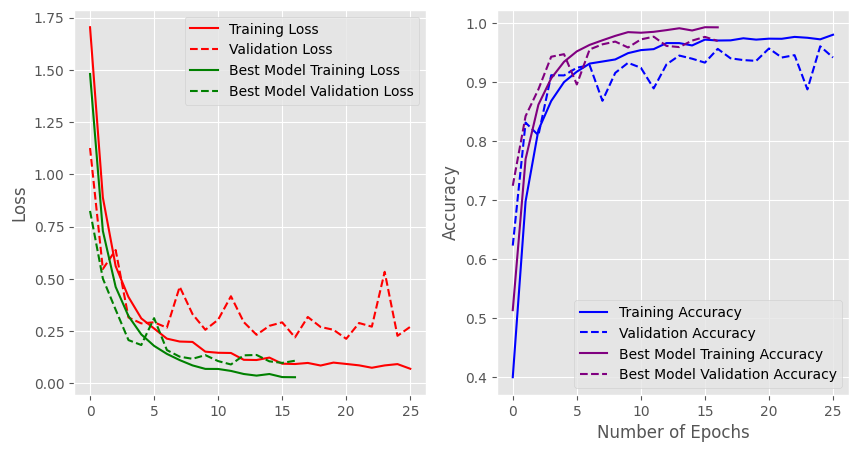

In [63]:
h = hist.history
h_best = history_best_model.history

plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Loss subplot
ax1.plot(h['loss'], c='red', label='Training Loss')
ax1.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
ax1.plot(h_best['loss'], c='green', label='Best Model Training Loss')
ax1.plot(h_best['val_loss'], c='green', linestyle='--', label='Best Model Validation Loss')
ax1.set_ylabel('Loss')
ax1.legend(loc='best')

# Accuracy subplot
ax2.plot(h['accuracy'], c='blue', label='Training Accuracy')
ax2.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
ax2.plot(h_best['accuracy'], c='purple', label='Best Model Training Accuracy')
ax2.plot(h_best['val_accuracy'], c='purple', linestyle='--', label='Best Model Validation Accuracy')
ax2.set_xlabel('Number of Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='best')

plt.show()

In [59]:
# Default
print("Default: [test loss, test accuracy]:", result)
#Using HPO
print("With HPO: [test loss, test accuracy]:", eval_result)

Default: [test loss, test accuracy]: [0.2737618684768677, 0.9430000185966492]
With HPO: [test loss, test accuracy]: [0.09262312948703766, 0.9739999771118164]


# SUMMARY

Should use Hyperparameter Optimazation